In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

%matplotlib inline

from src import nfw
from src import einasto

In [2]:
x = np.linspace(-2.0, 0.0, 20)
ys = np.load("ps.npy")
y = np.log10(np.median(np.cumsum(ys, axis=1), axis=0))
idx = [7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [3]:
y

array([-2.90934204, -2.662218  , -2.4215011 , -2.1798283 , -1.95166126,
       -1.72331077, -1.52860437, -1.34138851, -1.17944255, -1.03106165,
       -0.89897131, -0.77153414, -0.65052721, -0.53687547, -0.42923003,
       -0.32629106, -0.23358304, -0.14734346, -0.06970478,  0.        ])

In [4]:
# def d_f(x, c):
#     return (c / (np.log(1 + c) - (c / np.log(1 + c)))) * (
#      np.divide(1.0, 1.0 + c * x) -
#       np.divide(
#        np.log(1 + c * x) - np.divide(c * x, 1.0 + c * x),
#        np.power(np.log(1 + c * x), 2.0)))

def f(x, c):
    return np.log10(nfw.m(np.power(10.0, x), c))

def d_f(x, c):
    return np.log10(nfw.m_diff(np.power(10.0, x), c))

In [5]:
c_num = 7.943282347242816

In [6]:
c_fit = curve_fit(f, x[idx], y[idx])[0][0]
c_fit

7.8244643959667703

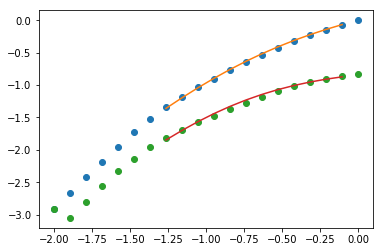

In [7]:
_ = plt.plot(
    x, y, 'o',
    x[idx], f(x[idx], c_fit),
    x, np.log10(np.median(ys, axis=0)), 'o',
    x[idx], d_f(x, c_fit)[idx],
)